Data Visualization has two plots
1. Matplotlib
2. Seaborn

Seaborn is an advanced version of plotting

#LineChart

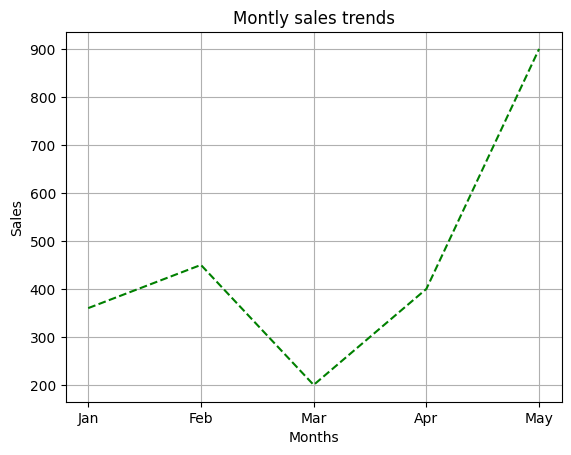

In [4]:
import matplotlib.pyplot as plt
months=['Jan','Feb','Mar','Apr','May']
sales=[360,450,200,400,900]
plt.plot(months,sales,color='green',linestyle='--')
plt.title("Montly sales trends")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

#Bar Chart

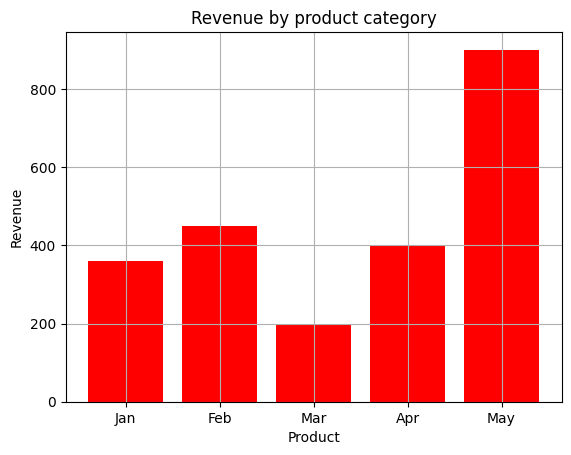

In [6]:
import matplotlib.pyplot as plt
Product=['Phone','Laptop','Earpods','Watch']
Revenue=[20000,50000,2000,10000]
plt.bar(months,sales,color='red')
plt.title("Revenue by product category")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

#Scatter plot

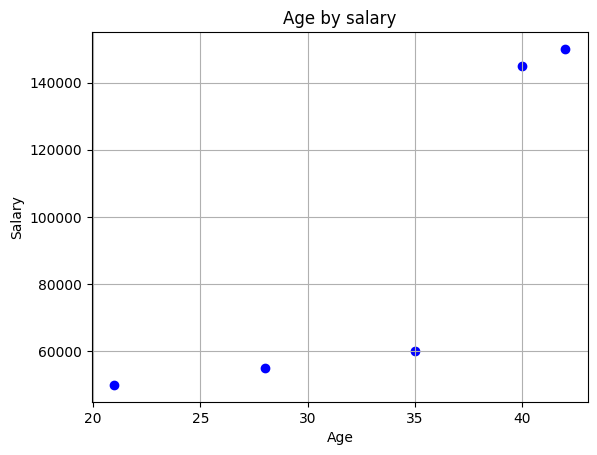

In [10]:
import matplotlib.pyplot as plt
Age=[21,35,28,40,42]
Salary=[50000,60000,55000,145000,150000]
plt.scatter(Age,Salary,color='blue')
plt.title("Age by salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

#Pie Chart

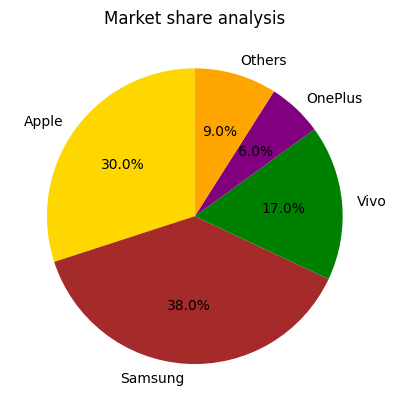

In [17]:
import matplotlib.pyplot as plt
brands=['Apple','Samsung','Vivo','OnePlus','Others']
market_share=[30,38,17,6,9]
colors=['gold','brown','green','purple','orange']
plt.pie(market_share,labels=brands,colors=colors,autopct='%1.1f%%',startangle=90)
plt.title("Market share analysis")
plt.show()

#Histogram

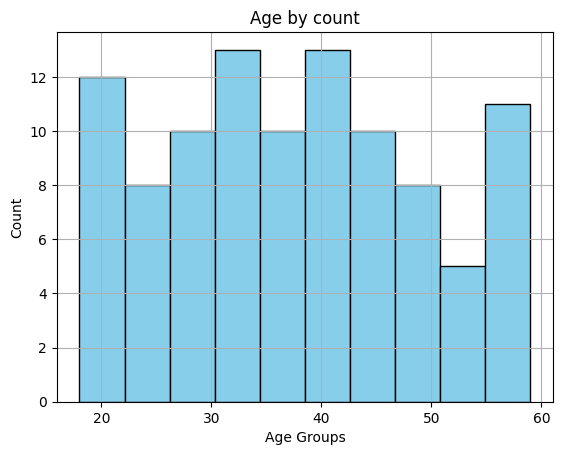

In [2]:
import matplotlib.pyplot as plt
import numpy as np
ages=np.random.randint(18,60,100)
plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
plt.title("Age by count")
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.grid(True)
plt.show()

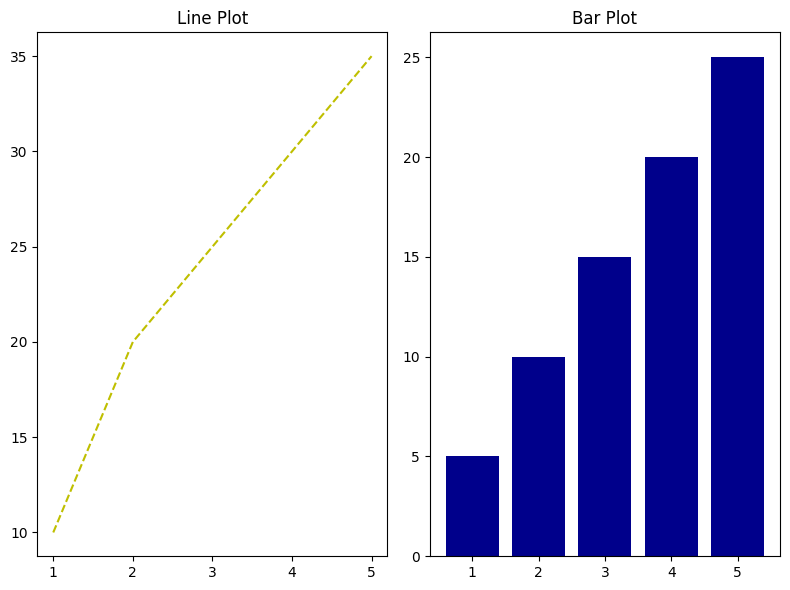

In [3]:
x=[1,2,3,4,5] 
y1=[10,20,25,30,35]
y2=[5,10,15,20,25]
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(x,y1,'y--')
plt.title('Line Plot')
plt.subplot(1,2,2)
plt.bar(x,y2,color='darkblue')
plt.title('Bar Plot')
plt.tight_layout()
plt.show()

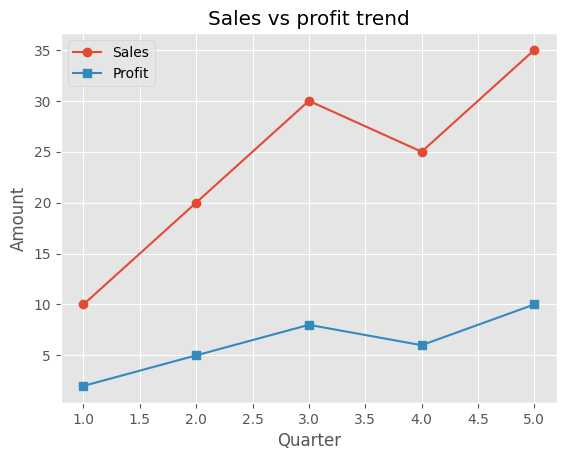

In [4]:
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales=[10,20,30,25,35]
profit=[2,5,8,6,10]
plt.plot(x,sales,label='Sales',marker='o')
plt.plot(x,profit,label='Profit',marker='s')
plt.title("Sales vs profit trend")
plt.xlabel("Quarter")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.savefig('Sales.png')
plt.show()

Dataset data.csv analysis

•  Inspect the dataset and list the number of rows, columns, data types, and any missing values.
•  Remove duplicate rows (if any) and re-check the dataset — how many rows were removed?
•  Parse the Date column to datetime, sort the data by date, and report how many rows (if any) have invalid/missing dates.
•  Handle missing values in numeric columns (explain and apply a method you choose), then state which method you used and why.

In [ ]:
#Task1
import pandas as pd
df=pd.read_csv("data.csv")
print("Number of rows and columns ",df.shape)
print("Datatypes ",df.dtypes)
print("Missing values ",df.isnull().sum())



Number of rows and columns  (32, 5)
Datatypes  Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object
Missing values  Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64


In [10]:
#Task2
df=pd.read_csv("data.csv")
bef=df.shape[0]
print("Before removing duplicates ",bef)
df=df.drop_duplicates()
af=df.shape[0]
print("After removing duplicates ",af)
rem=bef-af
print("Number of removals ",rem)

Before removing duplicates  32
After removing duplicates  31
Number of removals  1


In [12]:
#Task3
df=pd.read_csv("data.csv")
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
missing_dates=df['Date'].isna().sum()
print("Number of invalid/missing dates ",missing_dates)
df=df.sort_values(by='Date')
print("Data of sorting and parsing ")
print(df.head())
print("\nDataset shape:", df.shape)

Number of invalid/missing dates  1
Data of sorting and parsing 
   Duration       Date  Pulse  Maxpulse  Calories
0        60 2020-12-01    110       130     409.1
1        60 2020-12-02    117       145     479.0
2        60 2020-12-03    103       135     340.0
3        45 2020-12-04    109       175     282.4
4        45 2020-12-05    117       148     406.0

Dataset shape: (32, 5)


In [13]:
#task4
import pandas as pd
df = pd.read_csv("data.csv")
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns:", list(numeric_cols))
print("\nMissing values before handling:")
print(df[numeric_cols].isna().sum())
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print("\nMissing values after handling:")
print(df[numeric_cols].isna().sum())


Numeric columns: ['Duration', 'Pulse', 'Maxpulse', 'Calories']

Missing values before handling:
Duration    0
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

Missing values after handling:
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


Create a line plot of Calories over Date (with markers, dashed line, grid, rotated x-ticks) and save the image as line_calories_over_time.png.

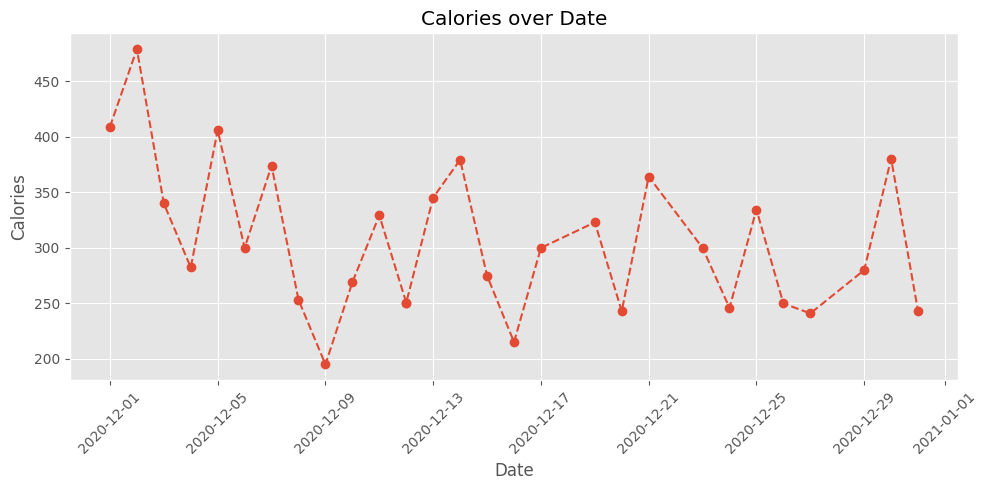

Plot saved as 'line_calories_over_time.png'
Number of points plotted: 29
Dropped 3 rows due to missing/invalid Date or Calories.


In [14]:
import matplotlib.pyplot as plt
df=pd.read_csv("data.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
df_plot = df.dropna(subset=['Date', 'Calories']).sort_values(by='Date')
plt.figure(figsize=(10, 5))
plt.plot(df_plot['Date'], df_plot['Calories'], linestyle='--', marker='o')
plt.title("Calories over Date")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("line_calories_over_time.png")
plt.show()
print(f"Plot saved as 'line_calories_over_time.png'")
print(f"Number of points plotted: {len(df_plot)}")
print(f"Dropped {len(df) - len(df_plot)} rows due to missing/invalid Date or Calories.")

Group data by Duration (or sensible duration bins), compute the average Pulse per group, and draw a bar chart comparing average pulse across duration groups; save as bar_avg_pulse_by_duration.png.

C:\Users\Srin\AppData\Local\Temp\ipykernel_8556\3400286457.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pulse = df_clean.groupby('DurationGroup')['Pulse'].mean()


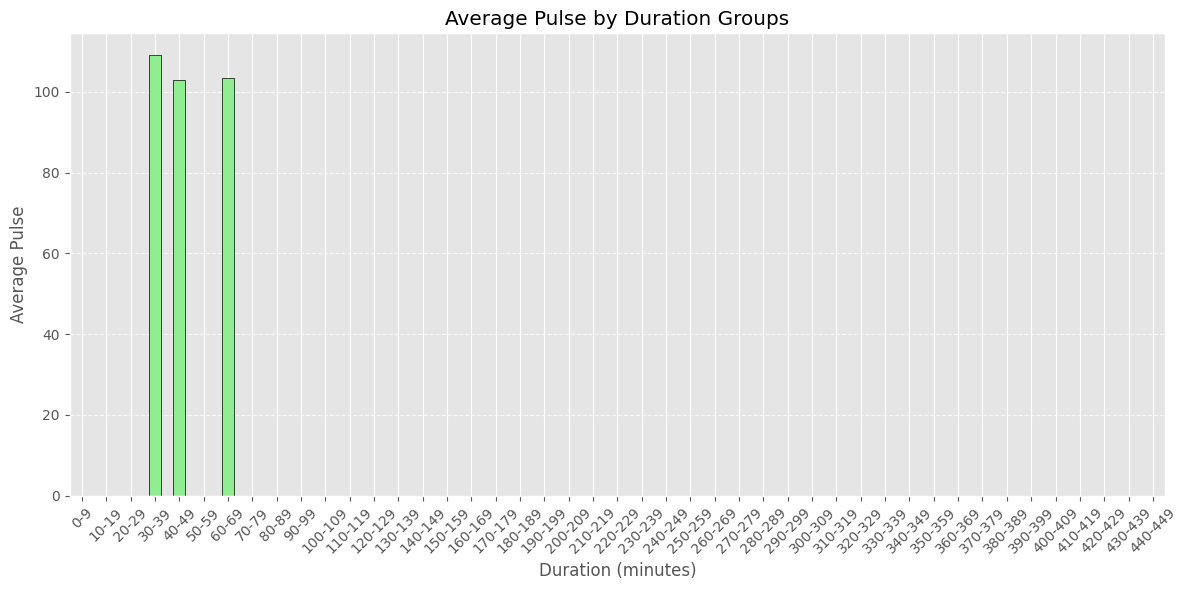

Bar plot saved as 'bar_avg_pulse_by_duration.png'
Duration groups plotted: 45


In [15]:
df=pd.read_csv("data.csv")
df['Duration']=pd.to_numeric(df['Duration'],errors='coerce')
df['Pulse']=pd.to_numeric(df['Pulse'],errors='coerce')
df_clean=df.dropna(subset=['Duration','Pulse'])
bins = np.arange(0, df_clean['Duration'].max() + 10, 10)
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
df_clean['DurationGroup'] = pd.cut(df_clean['Duration'], bins=bins, labels=labels, right=False)
avg_pulse = df_clean.groupby('DurationGroup')['Pulse'].mean()
plt.figure(figsize=(12,6))
avg_pulse.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Average Pulse by Duration Groups")
plt.xlabel("Duration (minutes)")
plt.ylabel("Average Pulse")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("bar_avg_pulse_by_duration.png")
plt.show()
print(f"Bar plot saved as 'bar_avg_pulse_by_duration.png'")
print(f"Duration groups plotted: {len(avg_pulse)}")

•  Create a pie chart showing the percentage breakdown of Maxpulse into ranges (e.g., <=120, 121–140, 141–160, >160) and save as pie_maxpulse_ranges.png.

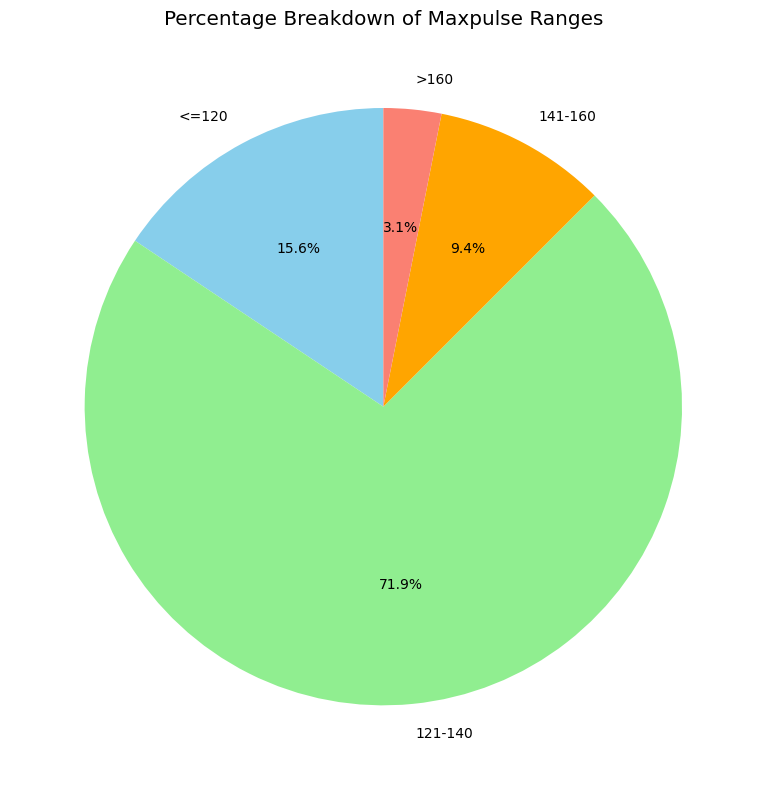

In [16]:
df=pd.read_csv("data.csv")
df['Maxpulse']=pd.to_numeric(df['Maxpulse'],errors='coerce')
df_clean=df.dropna(subset=['Maxpulse'])
bins=[0,120,140,160,df_clean['Maxpulse'].max()+1]
labels=['<=120','121-140','141-160','>160']
df_clean['MaxpulseRange'] = pd.cut(df_clean['Maxpulse'], bins=bins, labels=labels, right=False)
counts = df_clean['MaxpulseRange'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange','salmon'])
plt.title("Percentage Breakdown of Maxpulse Ranges")
plt.tight_layout()
plt.savefig("pie_maxpulse_ranges.png")
plt.show()

Plot a histogram of Calories with an appropriate number of bins, comment on shape/skewness, and save as hist_calories.png.

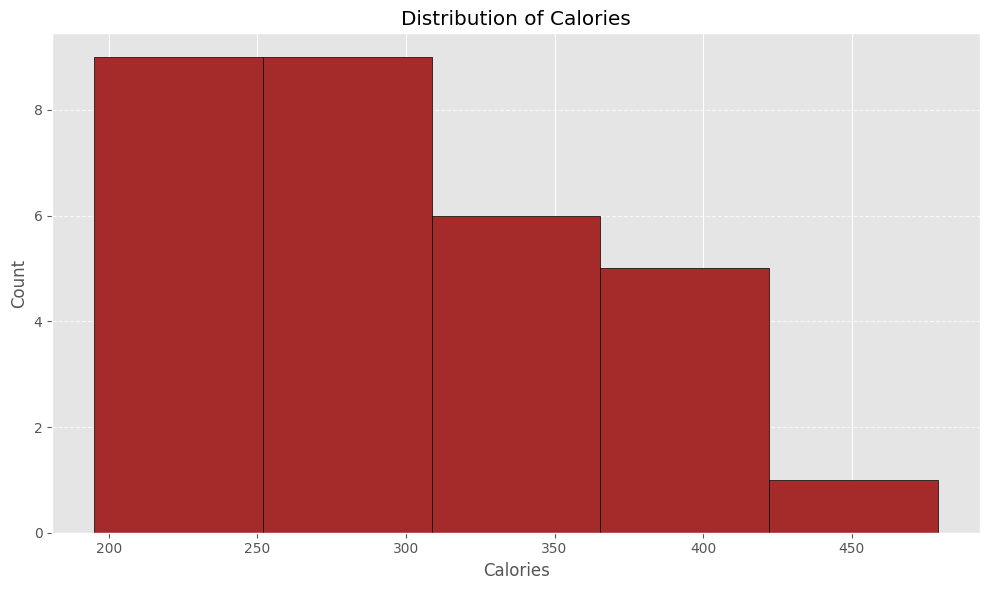

In [17]:
df=pd.read_csv("data.csv")
df['Calories']=pd.to_numeric(df['Calories'],errors='coerce')
df_clean=df.dropna(subset=['Calories'])
num_bins = int(len(df_clean)**0.5)
plt.figure(figsize=(10,6))
plt.hist(df['Calories'],bins=num_bins,color='brown',edgecolor='black')
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("hist_calories.png")
plt.show()

Build a multi-panel subplot figure (1 row × 2 columns): left = line plot of Pulse over Date, right = scatter of Duration vs Maxpulse; save as subplots_pulse_duration_maxpulse.png

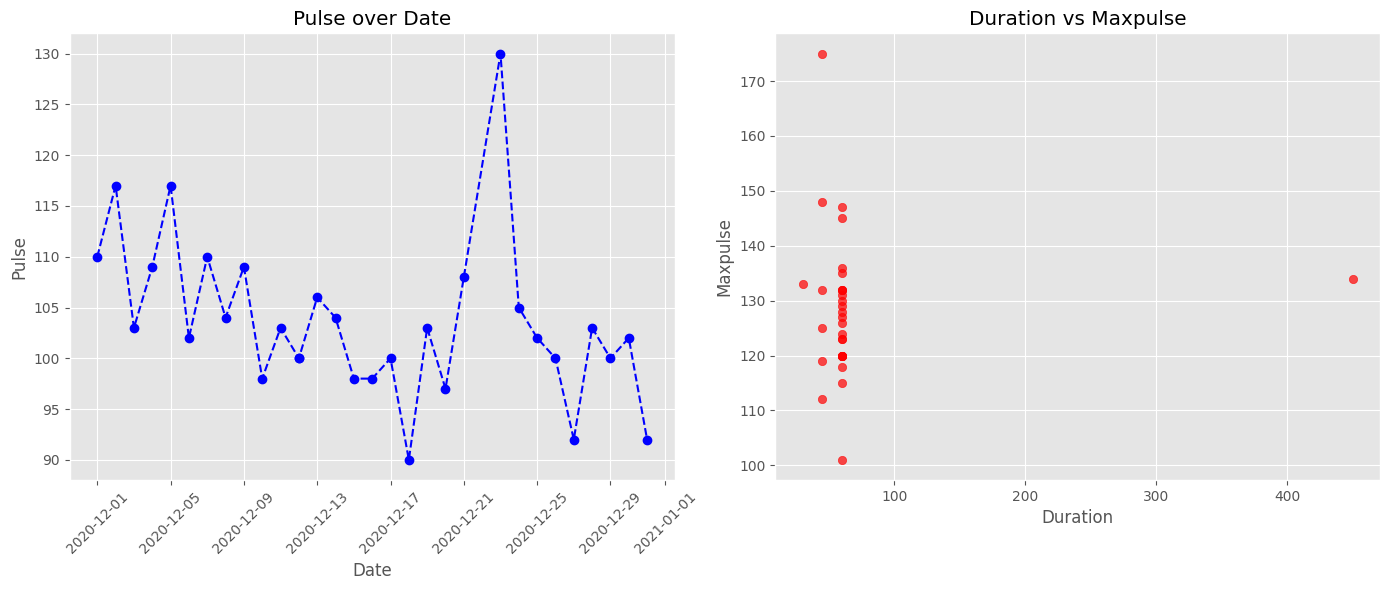

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")
df['Pulse'] = pd.to_numeric(df['Pulse'], errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Maxpulse'] = pd.to_numeric(df['Maxpulse'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df_line = df.dropna(subset=['Date', 'Pulse']).sort_values(by='Date')
df_scatter = df.dropna(subset=['Duration', 'Maxpulse'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(df_line['Date'], df_line['Pulse'], linestyle='--', marker='o', color='blue')
axes[0].set_title("Pulse over Date")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Pulse")
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)
axes[1].scatter(df_scatter['Duration'], df_scatter['Maxpulse'], color='red', alpha=0.7)
axes[1].set_title("Duration vs Maxpulse")
axes[1].set_xlabel("Duration")
axes[1].set_ylabel("Maxpulse")
axes[1].grid(True)
plt.tight_layout()
plt.savefig("subplots_pulse_duration_maxpulse.png")
plt.show()

Now operation for data cleaning on tip.csv

1.Basic Understanding
What does the dataset look like? 
What are the column names, data types, and basic statistics? 
Are there missing values or anomalies? 

In [24]:
import pandas as pd
df = pd.read_excel("tip.xlsx")
print("First 5 rows of the dataset:")
print(df.head(), "\n")
print(f"Dataset shape: {df.shape}\n")
print("Column names and data types:")
print(df.dtypes, "\n")
print("Basic statistics (numeric columns):")
print(df.describe(), "\n")
print("Missing values per column:")
print(df.isna().sum(), "\n")
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


First 5 rows of the dataset:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

Dataset shape: (244, 7)

Column names and data types:
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object 

Basic statistics (numeric columns):
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000 

Missi

2. Trend Analysis 
How does a numerical variable (e.g., Sales) change over time or index? 
Are there visible upward or downward trends? 
Are there any noticeable spikes, dips, or seasonality? 
lineplot : A line plot is a type of plot that displays data points connected by straight lines, typically used to show trends or changes over a continuous variable

In [ ]:
print("Columns in dataset:", list(df.columns))

Columns in dataset: ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


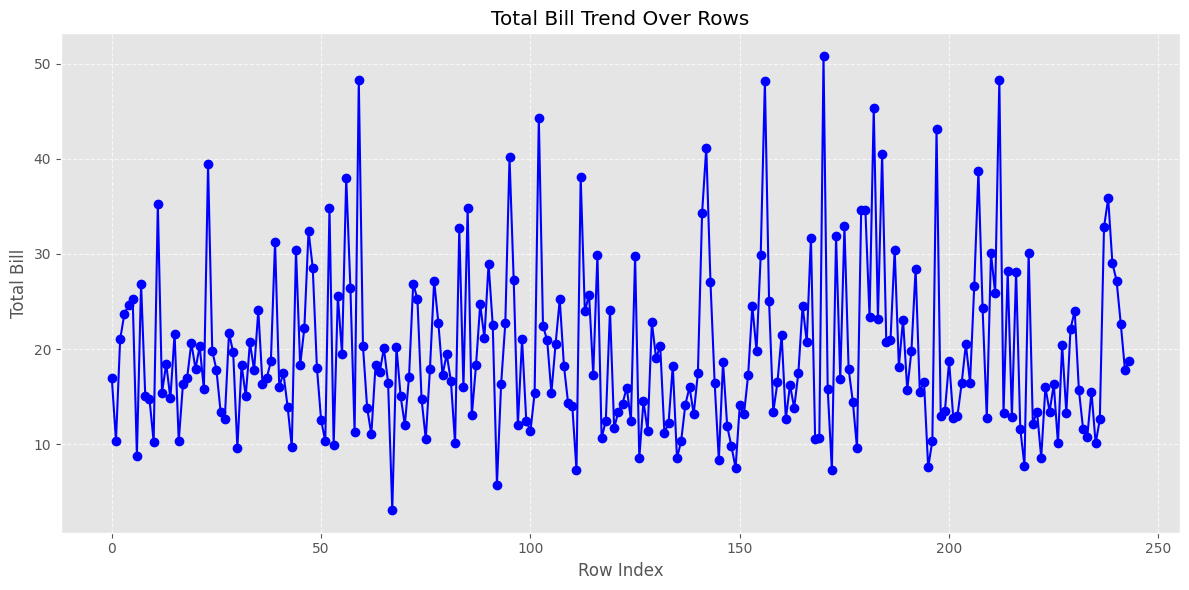

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tip.csv")
df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')
df_plot = df.dropna(subset=['total_bill'])

plt.figure(figsize=(12,6))
plt.plot(df_plot.index, df_plot['total_bill'], linestyle='-', marker='o', color='blue')
plt.title("Total Bill Trend Over Rows")
plt.xlabel("Row Index")
plt.ylabel("Total Bill")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("line_total_bill_trend.png")
plt.show()


3. Category Comparison 
Which category (e.g., Region, Product, Department) contributes most to the total value? 
Which categories have lower contributions? 
How big is the gap between categories? 
Bar Graph : A bar graph (or bar chart) is a visual representation of data using rectangular bars where the length or height of each bar corresponds to the value of the category it represents.

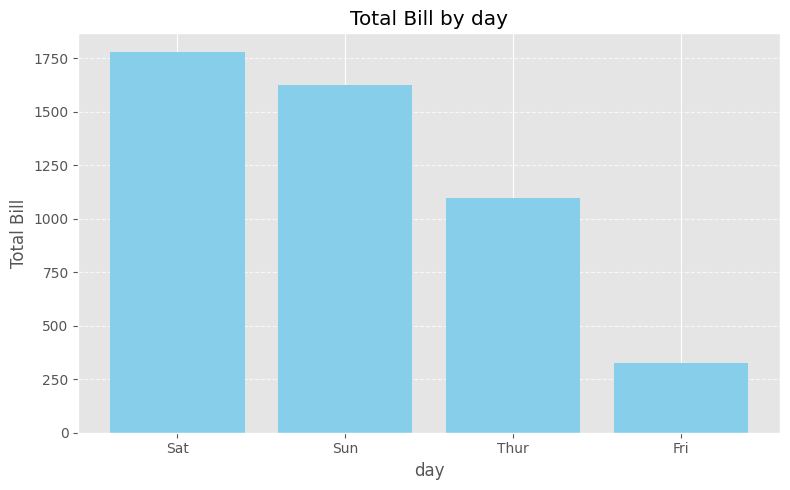

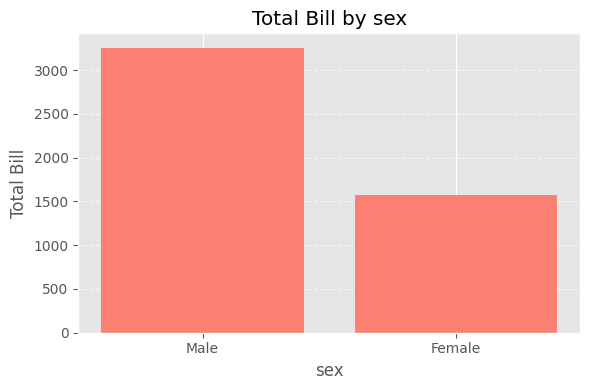

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("tip.csv")
df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')
df = df.dropna(subset=['total_bill'])
category_col = 'day'
category_sum = df.groupby(category_col)['total_bill'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(category_sum.index, category_sum.values, color='skyblue')
plt.title(f"Total Bill by {category_col}")
plt.xlabel(category_col)
plt.ylabel("Total Bill")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("bar_total_bill_by_day.png")
plt.show()
category_col = 'sex'
category_sum = df.groupby(category_col)['total_bill'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
plt.bar(category_sum.index, category_sum.values, color='salmon')
plt.title(f"Total Bill by {category_col}")
plt.xlabel(category_col)
plt.ylabel("Total Bill")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("bar_total_bill_by_sex.png")
plt.show()


4. Value Distribution 
How are values in a numerical column distributed? 
Are they concentrated around certain ranges or spread out evenly? 
Are there extreme values? 
Histplot : A histogram (histplot) is a graphical representation that shows the distribution of a numerical variable by dividing the data into intervals (bins) and displaying the frequency of data points in each bin

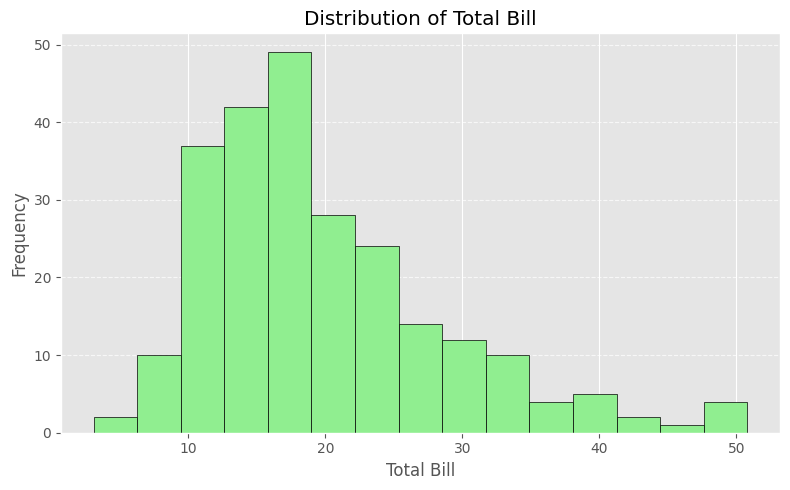

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("tip.csv")
df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')
df = df.dropna(subset=['total_bill'])
plt.figure(figsize=(8,5))
plt.hist(df['total_bill'], bins=15, color='lightgreen', edgecolor='black')
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("hist_total_bill.png")
plt.show()


5. Relationship Between Variables 
How does one numerical variable relate to another (e.g., Sales vs Profit)? 
Is there any visible correlation? 
Are there outliers? 
Scatterplot : A scatter plot is a type of plot that uses points to represent the values of two numerical variables, allowing you to visualize relationships, correlations, or patterns between them. 

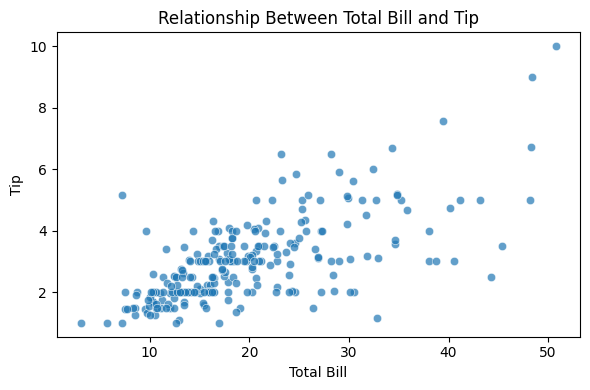

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("tip.csv")
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='total_bill', y='tip', alpha=0.7)
plt.title("Relationship Between Total Bill and Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.tight_layout()
plt.show()


6. Outliers & Spread 
How spread out are values in a numerical column? 
Are there any outliers? 
How does this spread differ across categories? 
Boxplot : A box plot (or box-and-whisker plot) is a graphical representation that shows the distribution of a numerical variable through its quartiles, highlighting the median, spread, and outliers.

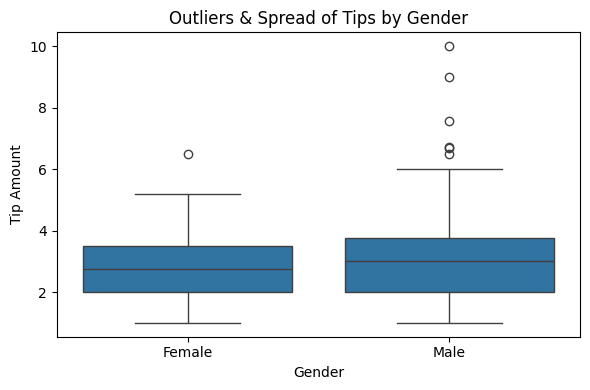

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("tip.csv")
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sex', y='tip')
plt.title("Outliers & Spread of Tips by Gender")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.tight_layout()
plt.show()


7. Proportions 
How is the dataset divided among different categories? 
Which category has the largest share? 
Is the distribution balanced or skewed? 
Pieplot : A pie plot (or pie chart) is a circular chart that shows the proportions of categories as slices of a circle, with the size of each slice corresponding to its relative percentage of the whole.

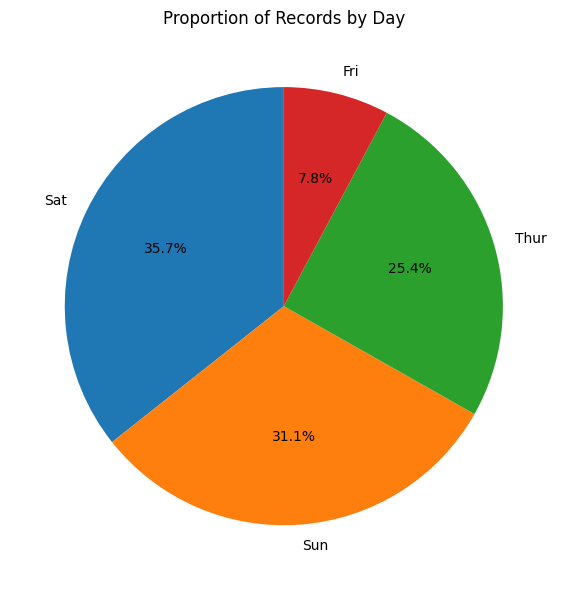

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("tip.csv")
category_counts = df['day'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Records by Day")
plt.tight_layout()
plt.show()


8. Multiple Visuals in One View 
How do multiple insights look side by side? 
Can we spot patterns when trend, distribution, and relationships are combined visually? 
Which plot gives the clearest story? 
Subplots : Subplots are multiple plots displayed together within a single figure, allowing you to compare different visualizations side by side or in a grid layout.

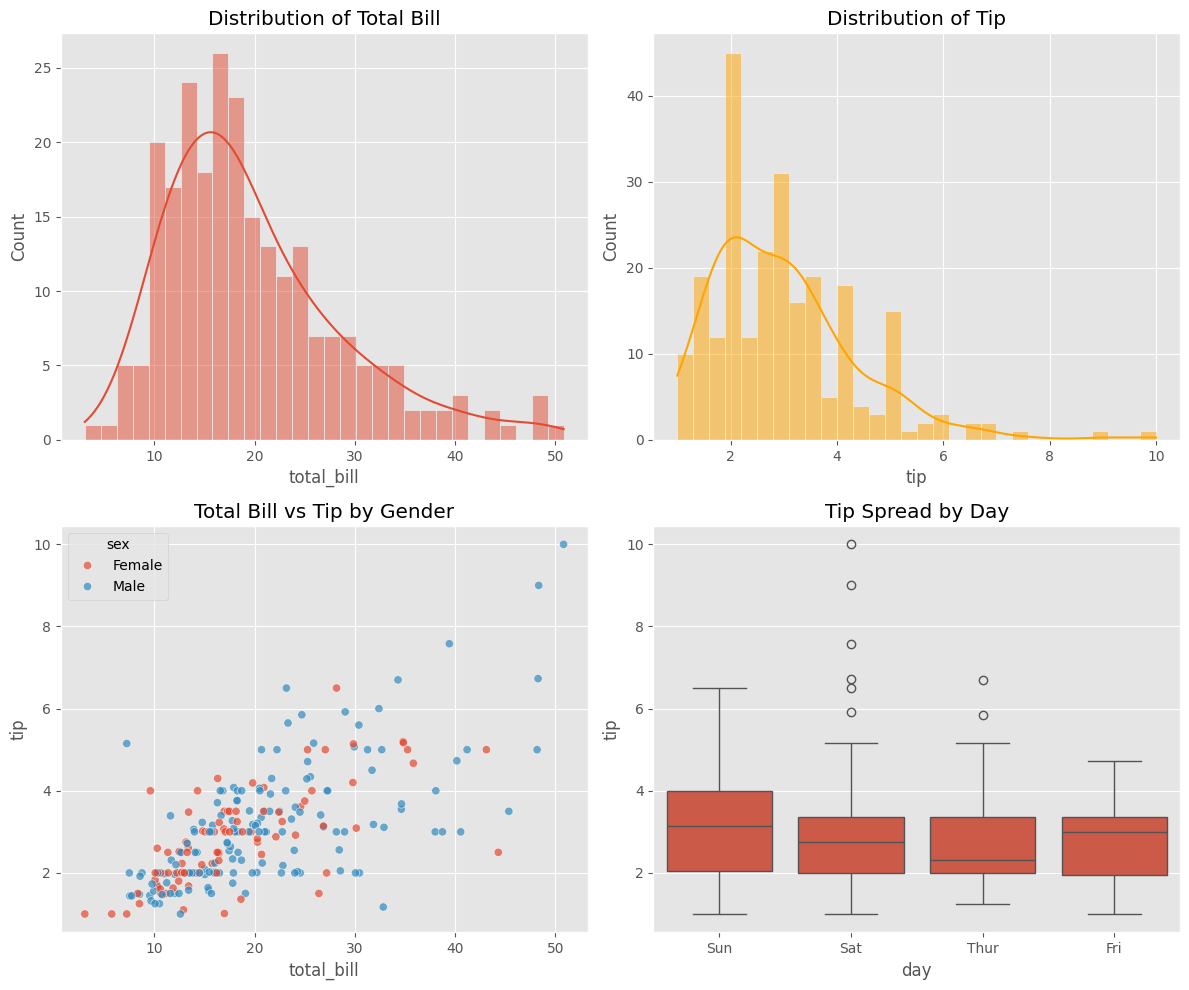

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("tip.csv")
plt.style.use('ggplot')
fig, axes = plt.subplots(2, 2, figsize=(12,10))
sns.histplot(df['total_bill'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution of Total Bill")
sns.histplot(df['tip'], bins=30, kde=True, ax=axes[0,1], color='orange')
axes[0,1].set_title("Distribution of Tip")
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', ax=axes[1,0], alpha=0.7)
axes[1,0].set_title("Total Bill vs Tip by Gender")
sns.boxplot(data=df, x='day', y='tip', ax=axes[1,1])
axes[1,1].set_title("Tip Spread by Day")
plt.tight_layout()
plt.show()
